# STAT 207 Lab 10 - Group Part - [5 total points]
## Classifier Models with Logistic Regression

Due: Tuesday, November 2, 11:59pm CST

## <u>Case Study</u>: Build your Own Classifier Models

In this analysis, you will **choose your own dataset** to and build **two classifier models** with it.

## 1. [0.25 pt]  Choose a Dataset

You can use one of the csv files that we have used in class or you can download your own dataset. Kaggle could be one of many places that you go to to find an interesting dataset: https://www.kaggle.com/datasets?fileType=csv&sizeStart=0%2CKB&sizeEnd=100%2CKB

Whichever dataset you choose, make sure that this dataset meets the following specifications:

1. It has at least one categorical variable with two levels.
2. It has at least two other variables (can be categorical or numerical.)


**If you choose to use a csv file that we have used in class, make sure you are not building the exact same classifier model that we have done in class!**







In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2. Fit two Logistic Regression Models

### 2.1. [0.25 pt] Choose a "success level".

Next, we would like to build two logistic regression models. Your logistic regression models should predict the probability that one of your categorical variable values is a "success level". You can choose which level you want to be your "success level".

The categorical variable that you choose to represent as your response variable should have just **two levels** when you use it in your logistic regression model. However, if you happen to have an interesting categorical variable that has more than two levels you can turn it into a variable with just two levels by using the **.map()** function. For instance, in the example below we converted the *party* categorical variable (which technically has three levels: democrat, independent, republican) into a categorical variable *y* which just has two levels (1=democrat, 0=not democrat).

In [26]:
df['gender'] = df['Genre'].map({'Male':0, 'Female':1})
df['gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: gender, Length: 200, dtype: int64

In [31]:
df['spending_score'] = df['Spending Score (1-100)']
df['income'] = df['Annual Income (k$)']

### 2.2. [0.75 pt] Fit model 1

First, fit a logistic regression model that predicts this success level using a set of explanatory variables of your choosing. Display the summary output table for this below.

In [33]:
mod1 = smf.logit(formula='gender ~ spending_score', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.684240
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                0.002464
Time:                        15:45:21   Log-Likelihood:                -136.85
converged:                       True   LL-Null:                       -137.19
Covariance Type:            nonrobust   LLR p-value:                    0.4110
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0134      0.311      0.043      0.966      -0.597       0.623
spending_score     0.0046      0.006      0.821      0.412      -0.006       0.015
==================================================================================
"""

### 2.3. [0.75 pt] Fit model 2

Now, fit another logistic regression model that predicts this success level using *a different set* of explanatory variables of your choosing. Display the summary output table for this below.

In [34]:
mod2 = smf.logit(formula='gender ~ income', data=df).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.684339
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                0.002320
Time:                        15:45:40   Log-Likelihood:                -136.87
converged:                       True   LL-Null:                       -137.19
Covariance Type:            nonrobust   LLR p-value:                    0.4250
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5048      0.361      1.397      0.162      -0.203       1.213
income        -0.0043      0.005     -0.797      0.426      -0.015       0.006
==============================================================================
"""

## 3. ROC Curves

### 3.1. [2 pt] Create Two ROC Curves

Next, create two ROC curves for the observations in the dataset:
* one using model 1 to make predictions, and
* the other using model 2 to make predictions.

In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fprs, tprs, thresholds = roc_curve(y_true=df['gender'], 
                            y_score=mod1.fittedvalues)
auc = roc_auc_score(y_true=df['gender'], 
                    y_score=mod1.fittedvalues)
print(auc)

0.5233867694805194


In [38]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('Gender')
    plt.ylabel('Spending Score')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

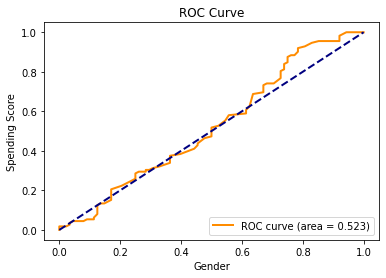

In [39]:
plot_roc(fprs, tprs, auc)

In [41]:
fprs, tprs, thresholds = roc_curve(y_true=df['gender'], 
                            y_score=mod2.fittedvalues)
auc = roc_auc_score(y_true=df['gender'], 
                    y_score=mod2.fittedvalues)
print(auc)

0.533685064935065


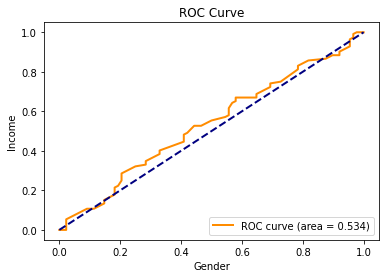

In [42]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('Gender')
    plt.ylabel('Income')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

### 3.2. [1 pt] Interpretation

Comparing these two ROC curves as well as the AUC of these curves, which of your two models is better at making predictions? Explain.

Our model 2 is slightly better at making predictions than model 1 because y = 0.534 in model 2 while y = 0.523 in model 1.

### <u>Contribution Report</u>:

Samvit Dedhia and Hadley So